In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pickle
import emullver
import plotting
import _globals
from xspec import *
import torch
import torch.nn as nn
import torch.optim as optim
from xspec_comparison import *
from emullver import *
from error import *
import random
from emullver import *
import tensorflow as tf
import matplotlib.colors as colors
from models import *

Xset.chatter = 0
Xset.logChatter = 0
%load_ext autoreload
%autoreload 2

2024-08-26 11:38:39.231016: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-26 11:38:39.234732: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-26 11:38:39.276771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 11:38:39.276796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 11:38:39.278108: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Import our training, validation, and testing data

In [2]:
train_X, train_Y, valid_X, valid_Y, test_X, test_Y = get_data()

Initialize our model and the Matzeu et al emulator

In [3]:
model1 = get_model1('model_weights/model10.pth')
em = emulator

Compute the tuples of parameters + their error

In [15]:
tuples = model_get_tuples(model1, test_X, test_Y)

Sort the tuples by their error

In [6]:
tuples = get_sorted_tuples(tuples,reverse=False)

Graph the highest error X-ray spectra,

Notice how our emulator contains less noise than the Matzeu emulator

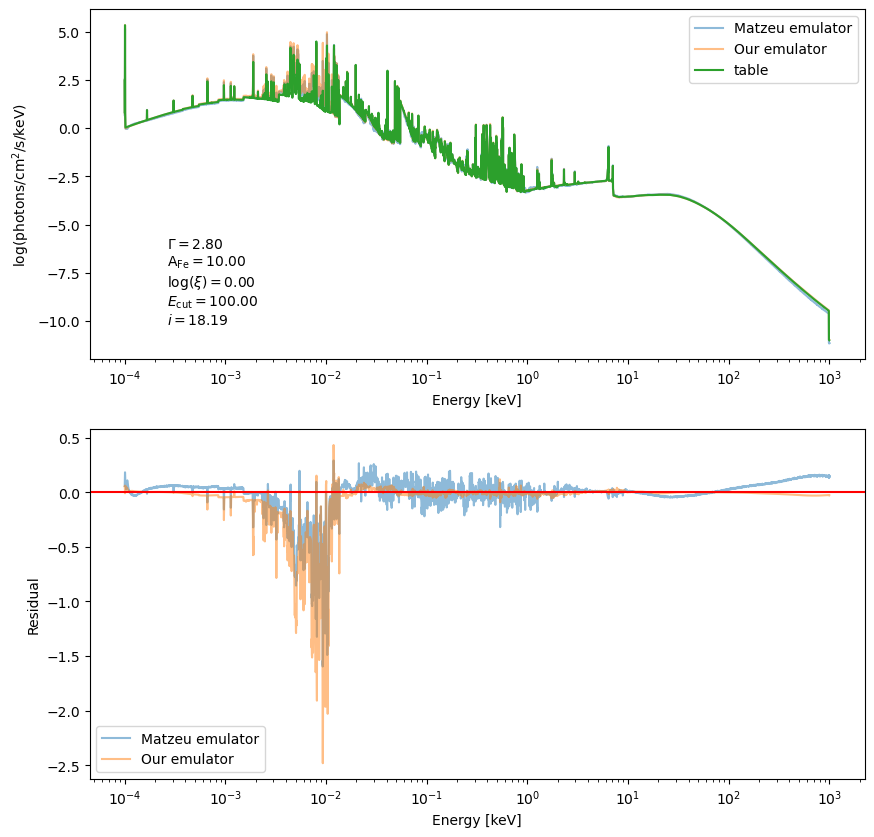

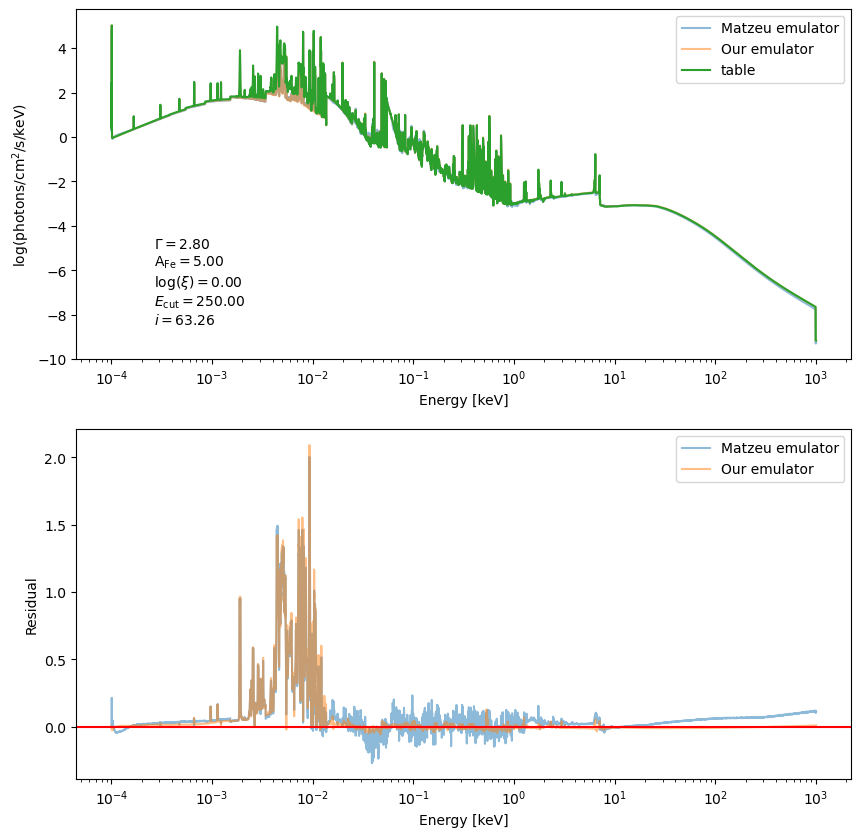

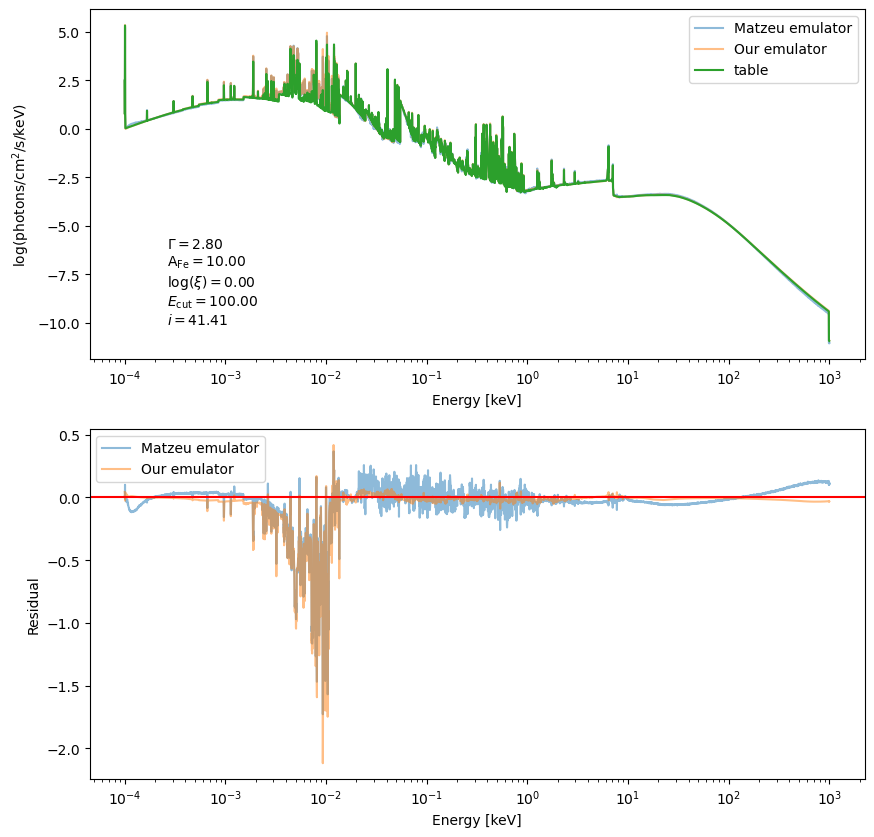

In [11]:
model_plots([em, model1], ['Matzeu emulator', 'Our emulator'], tuples, test_Y, 3)

In [12]:
tuples = get_sorted_tuples(tuples,reverse=True)

Graph the lowest error X-ray spectra,

Notice how our emulator contains less noise than the Matzeu emulator

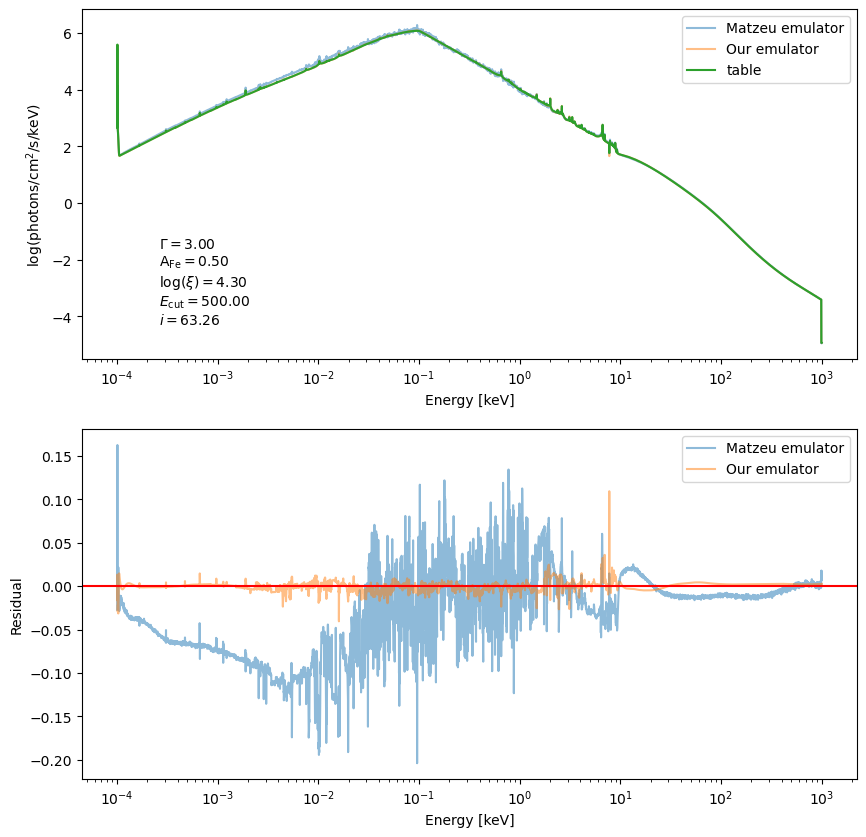

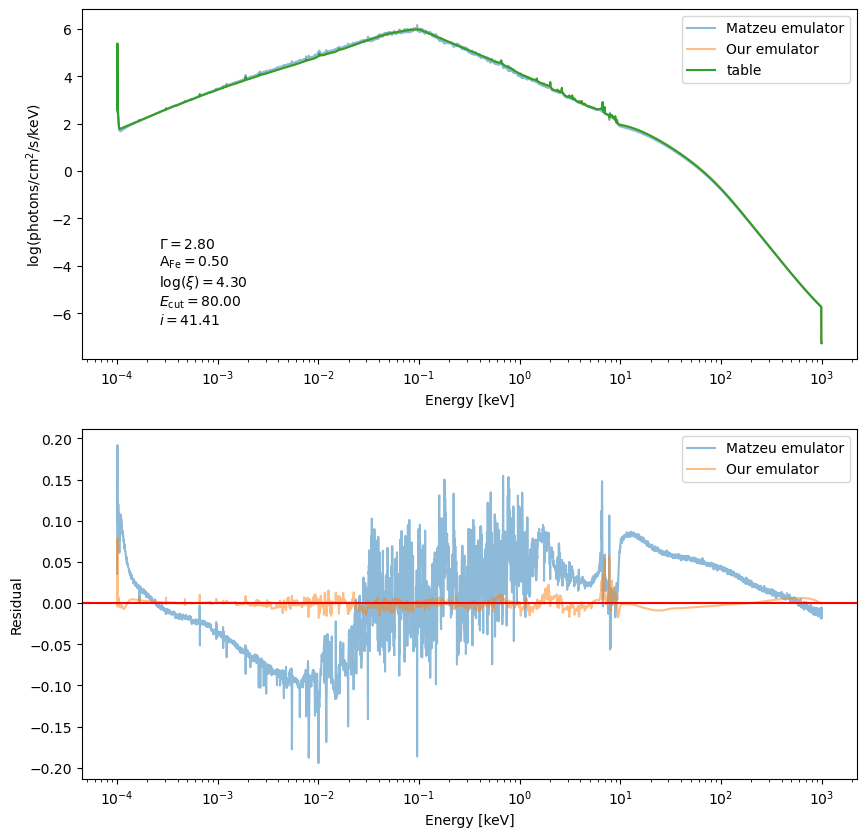

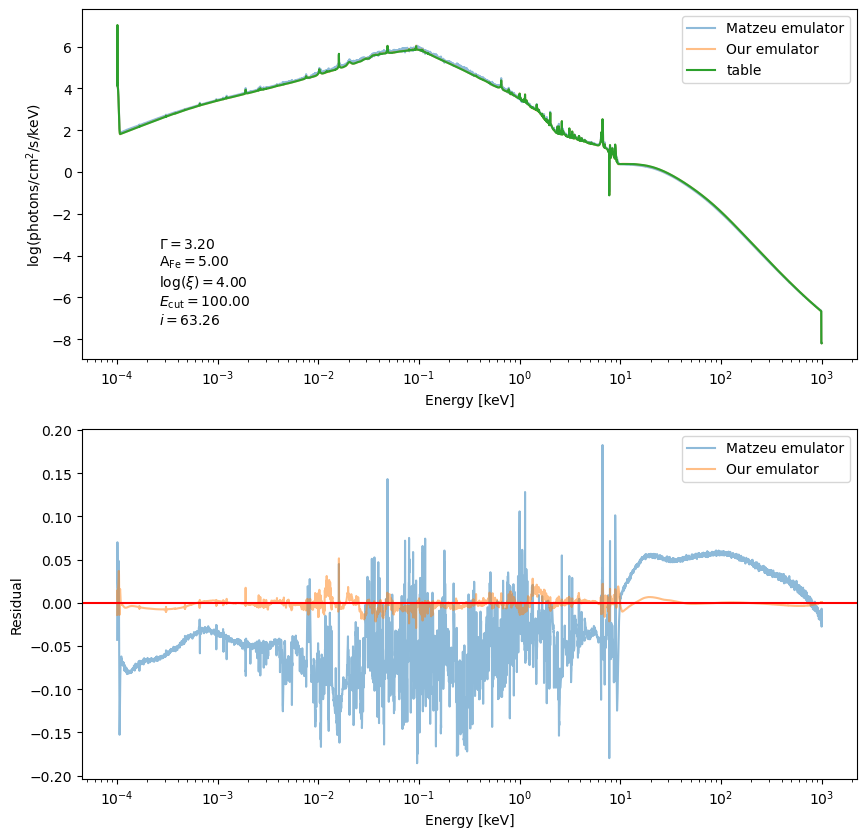

In [14]:
model_plots([em, model1], ['Matzeu emulator', 'Our emulator'], tuples, test_Y, 3)